In [1]:
from pandas_datareader import data as pdr
from datetime import datetime,date
import pandas as pd
import yfinance as yf
yf.pdr_override()


from datetime import datetime
startdate = datetime(2015,1,1)
today = date.today()
enddate = today

# data = pd.read_csv("TATASTEEL.NS.csv")

df = pdr.get_data_yahoo("TATASTEEL.NS", start=startdate, end=enddate)

# dates = pd.to_datetime(data["Date"])

data = df.astype(float).reset_index()["Close"]

data


[*********************100%***********************]  1 of 1 completed


0        38.533432
1        39.133656
2        39.700535
3        37.776009
4        37.051926
           ...    
2036    103.599998
2037    104.500000
2038    104.099998
2039    104.849998
2040    104.349998
Name: Close, Length: 2041, dtype: float64

In [2]:
data.shape

(2041,)

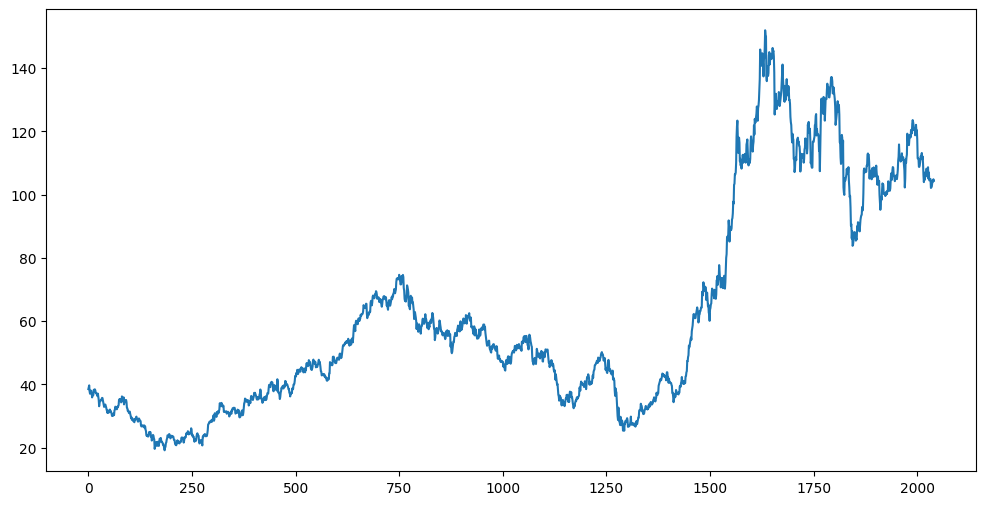

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data)

In [4]:
import numpy as np


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# data = np.array(data).reshape(-1,1)
data = scaler.fit_transform(np.array(data).reshape(-1,1))

print(data)

# print(scaler.inverse_transform(df))

[[-0.68672826]
 [-0.66877918]
 [-0.65182723]
 ...
 [ 1.2739739 ]
 [ 1.2964019 ]
 [ 1.2814499 ]]


In [6]:
data = np.array(data)
train_size = int(len(data)*0.80)
train_data,test_data = data[:train_size] ,data[train_size:]
train_data,test_data

(array([[-0.68672826],
        [-0.66877918],
        [-0.65182723],
        ...,
        [ 2.26858078],
        [ 2.42587562],
        [ 2.45323803]]),
 array([[2.53188522],
        [2.70458106],
        [2.65763157],
        [2.64791286],
        [2.27456149],
        [2.22387446],
        [2.36143255],
        [2.31822152],
        [2.27291699],
        [2.30012928],
        [2.46893745],
        [2.49779469],
        [2.38101963],
        [2.42258617],
        [2.4780584 ],
        [2.45817199],
        [2.43335162],
        [2.43679075],
        [2.48807598],
        [2.53726818],
        [2.50392506],
        [2.51229815],
        [2.45742457],
        [2.30536257],
        [1.90823757],
        [2.0251623 ],
        [2.06583174],
        [2.1044077 ],
        [1.96505521],
        [1.96027068],
        [1.9915203 ],
        [2.03517988],
        [2.01529392],
        [2.04205812],
        [2.12070532],
        [2.09887553],
        [1.98838028],
        [2.01619101],
        [2.

In [7]:
def CreateDataset(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        
        dataX.append(dataset[i:i+time_steps,0])
        dataY.append(dataset[i+time_steps,0])
    return np.array(dataX),np.array(dataY)
    
    

In [8]:
time_steps = 14
train_x,train_y = CreateDataset(train_data,time_steps)
test_x,test_y = CreateDataset(test_data,time_steps)

In [9]:
train_x.shape,train_y.shape

((1617, 14), (1617,))

In [10]:
train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
test_x  = test_x.reshape((test_x.shape[0],test_x.shape[1],1))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM




In [12]:

model = Sequential()
model.add(LSTM(64,activation='relu',return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 14, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 37,665
Trainable params: 37,665
Non-trainable params: 0
_________________________________________________________________


In [14]:
train_x.shape,train_y.shape

((1617, 14, 1), (1617,))

In [16]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=50,batch_size=16,verbose=1,validation_split=0.1)

Epoch 1/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0101 - val_loss: 0.0306
Epoch 2/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0099 - val_loss: 0.0566
Epoch 3/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0092 - val_loss: 0.0285
Epoch 4/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0103 - val_loss: 0.0462
Epoch 5/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0086 - val_loss: 0.0270
Epoch 6/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0086 - val_loss: 0.0911
Epoch 7/50
102/102 [==============================] - 2s 23ms/step - loss: 0.0088 - val_loss: 0.0376
Epoch 8/50
102/102 [==============================] - 2s 23ms/step - loss: 0.0084 - val_loss: 0.0342
Epoch 9/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0085 - val_loss: 0.0715
Epoch 10/50
102/102 [==============================] - 2s 22ms/step - loss: 0.0079 - val_lo

In [18]:
predict = model.predict(test_x)

print(1-np.square(predict-test_y).mean())


13/13 [==============================] - 0s 9ms/step
0.7165615172061428


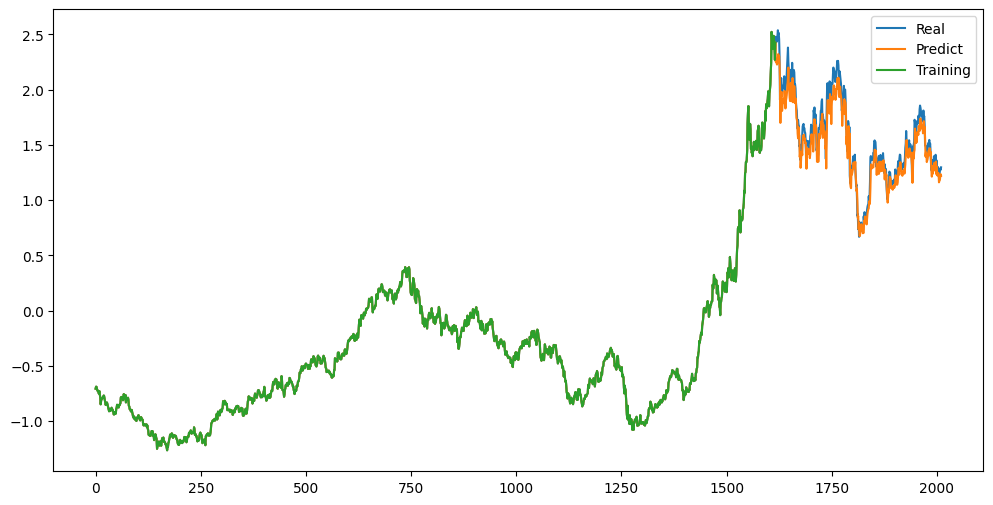

In [19]:
plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,predict))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])


In [27]:
future = 30
lists = np.array(test_x[0].reshape(1,time_steps,test_x[]))
preds =[]
l=[]
for i in range(future):
    print(i)
    pred = model.predict(lists[i])
#     [[1,2,3],[2,3,4],[5,6,7]]
    l = np.append(lists[i],listspred)
    preds.append(pred[0][0])
    l = np.delete(l,0)
    
    lists = np.vstack([lists,l])
print(preds)
print(lists)

0
1/1 [==============================] - 0s 31ms/step
1
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 30ms/step
4
1/1 [==============================] - 0s 28ms/step
5
1/1 [==============================] - 0s 34ms/step
6
1/1 [==============================] - 0s 36ms/step
7
1/1 [==============================] - 0s 30ms/step
8
1/1 [==============================] - 0s 29ms/step
9
1/1 [==============================] - 0s 29ms/step
10
1/1 [==============================] - 0s 30ms/step
11
1/1 [==============================] - 0s 39ms/step
12
1/1 [==============================] - 0s 33ms/step
13
1/1 [==============================] - 0s 30ms/step
14
1/1 [==============================] - 0s 29ms/step
15
1/1 [==============================] - 0s 39ms/step
16
1/1 [==============================] - 0s 40ms/step
17
1/1 [==============================] - 0s 29ms/step
18
1/1 [============

In [29]:
preds = np.array(preds)

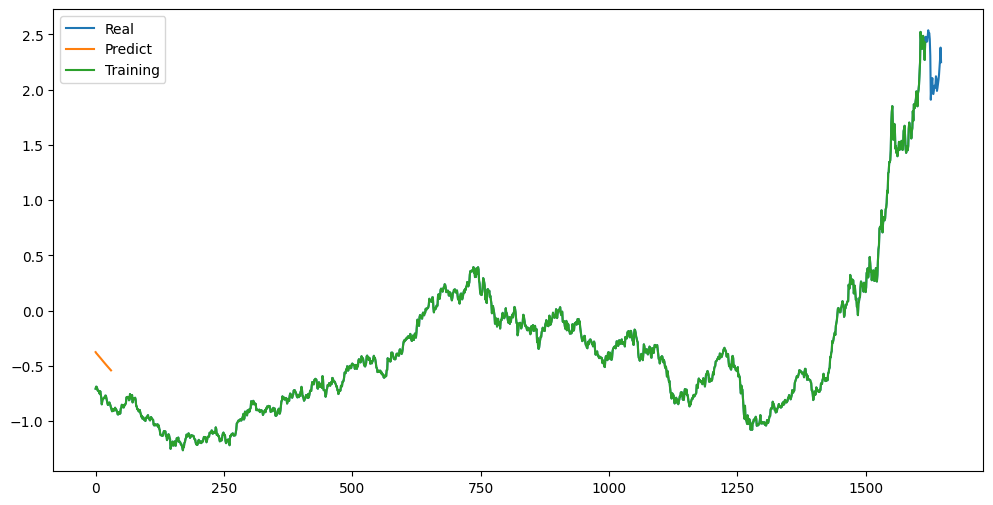

In [30]:
plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y[:31]))
plt.plot(np.append(train_y,preds))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])

0
1/1 [==============================] - 0s 27ms/step
1
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 31ms/step
3
1/1 [==============================] - 0s 28ms/step
4
1/1 [==============================] - 0s 31ms/step
5
1/1 [==============================] - 0s 29ms/step
6
1/1 [==============================] - 0s 30ms/step
7
1/1 [==============================] - 0s 28ms/step
8
1/1 [==============================] - 0s 31ms/step
9
1/1 [==============================] - 0s 32ms/step
10
1/1 [==============================] - 0s 31ms/step
11
1/1 [==============================] - 0s 30ms/step
12
1/1 [==============================] - 0s 31ms/step
13
1/1 [==============================] - 0s 36ms/step
14
1/1 [==============================] - 0s 31ms/step
15
1/1 [==============================] - 0s 29ms/step
16
1/1 [==============================] - 0s 35ms/step
17
1/1 [==============================] - 0s 40ms/step
18
1/1 [============

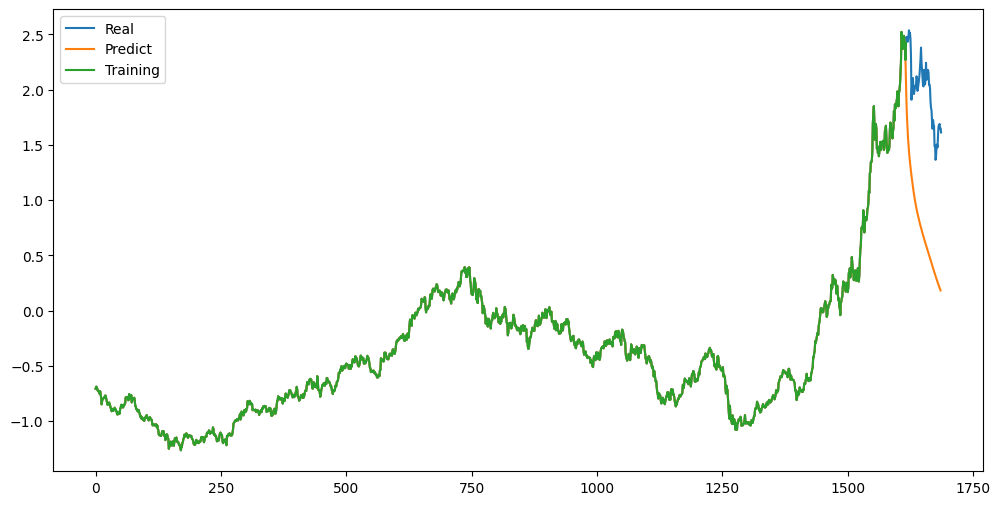

In [41]:
start = 1616
future = 5
lists = np.array(train_x[start].reshape(1,time_steps))
preds =[]
l=[]
for i in range(future*time_steps):
    print(i)
    pred = model.predict(lists[i].reshape(1,time_steps,1))
#     [[1,2,3],[2,3,4],[5,6,7]]
    l = np.append(lists[i],pred)
    preds.append(pred[0][0])
    l = np.delete(l,0)
    
    lists = np.vstack([lists,l])

preds = np.array(preds)

plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y[:future*time_steps]))
plt.plot(np.append(train_y[:start],preds))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])